In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ANA 680/Week 4/Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [5]:
#Numerical  features only
df.select_dtypes(exclude=['object']).columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [6]:
#Categorical features only
df.select_dtypes(include=['object']).columns

Index(['Class'], dtype='object')

In [7]:
#Descriptive statistics of numerical features
df.select_dtypes(exclude=['object']).describe().round(decimals=2).transpose()

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.28,29324.10,20420.00,36328.00,44652.00,61332.00,254616.00
Perimeter,13611.0,855.28,214.29,524.74,703.52,794.94,977.21,1985.37
MajorAxisLength,13611.0,320.14,85.69,183.60,253.30,296.88,376.50,738.86
MinorAxisLength,13611.0,202.27,44.97,122.51,175.85,192.43,217.03,460.20
AspectRation,13611.0,1.58,0.25,1.02,1.43,1.55,1.71,2.43
Eccentricity,13611.0,0.75,0.09,0.22,0.72,0.76,0.81,0.91
ConvexArea,13611.0,53768.20,29774.92,20684.00,36714.50,45178.00,62294.00,263261.00
EquivDiameter,13611.0,253.06,59.18,161.24,215.07,238.44,279.45,569.37
Extent,13611.0,0.75,0.05,0.56,0.72,0.76,0.79,0.87
Solidity,13611.0,0.99,0.00,0.92,0.99,0.99,0.99,0.99


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f683f576280>,
      dtype=object)

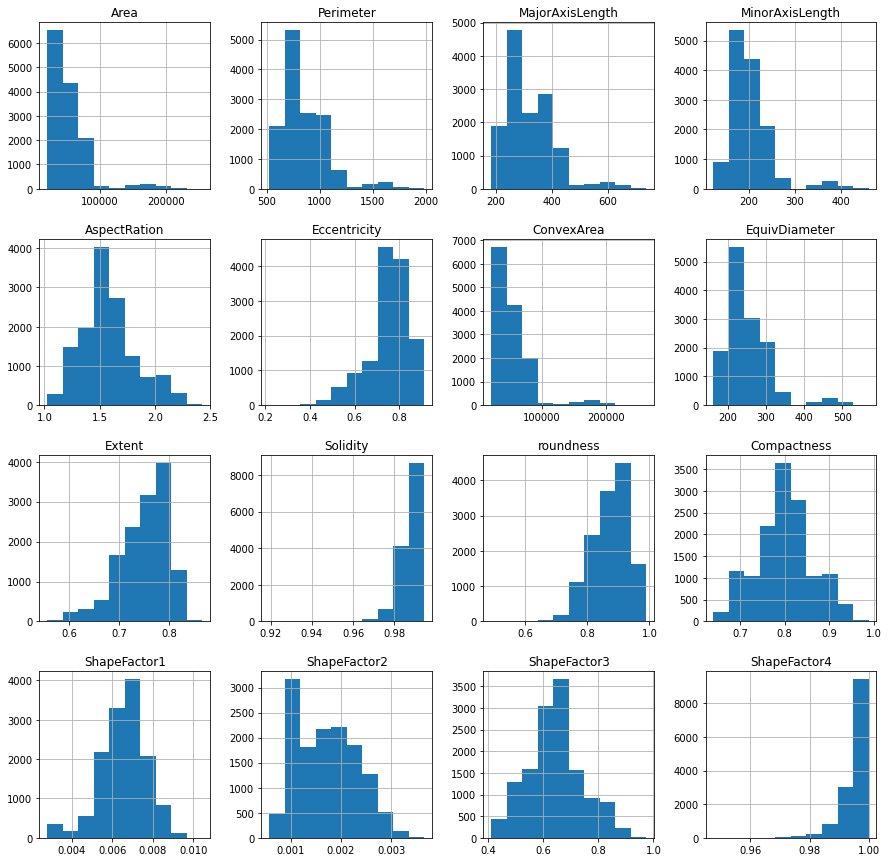

In [8]:
df.hist(figsize=(15,15))

In [9]:
df.items()

<generator object DataFrame.items at 0x7f683fc6c660>

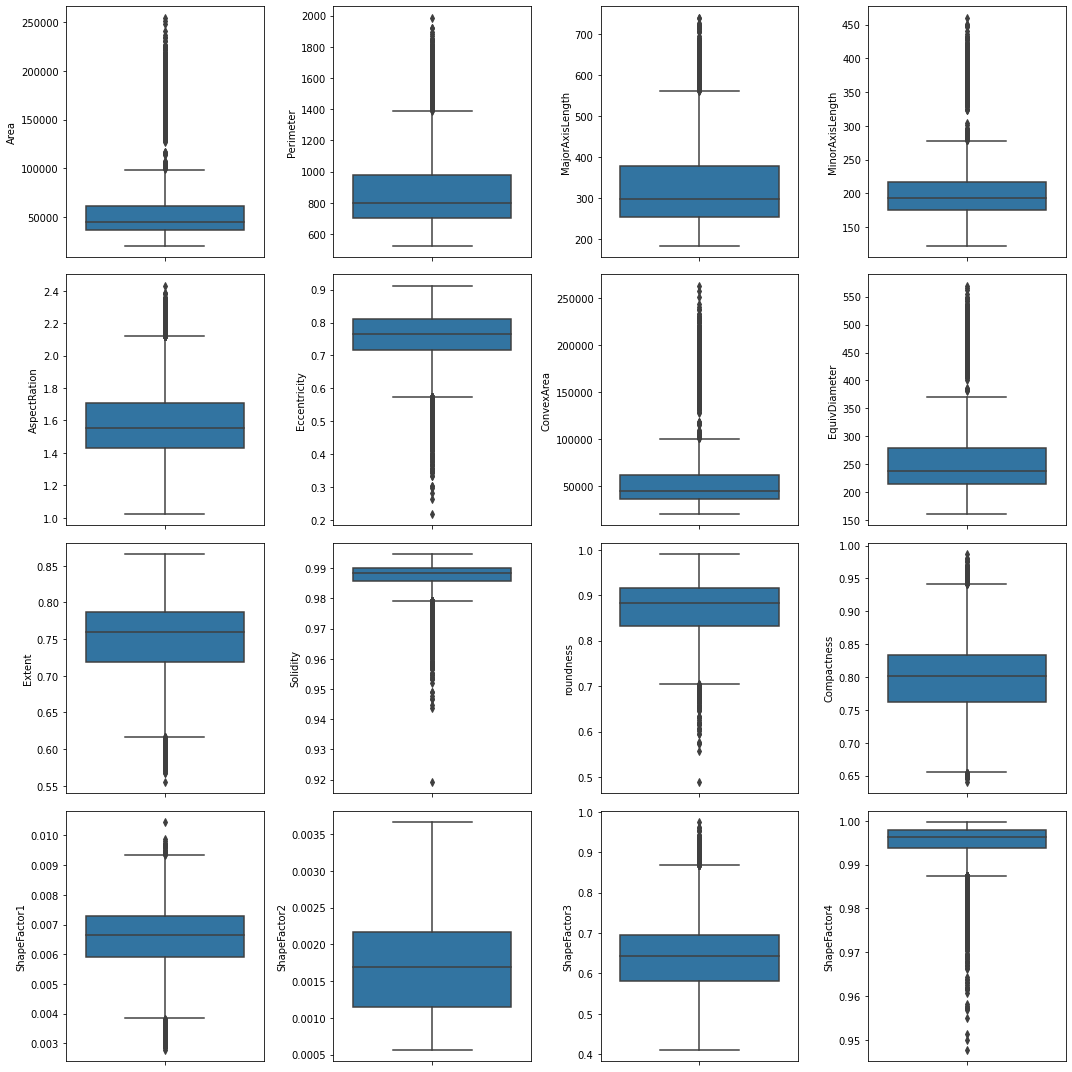

In [10]:
# Get the numerical columns in the dataframe
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']

# Create a grid of subplots
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Flatten the 2D array of axes objects into a 1D array
ax = ax.flatten()

# Iterate over the numerical columns
for i, col in enumerate(numerical_columns):
    # Check if the index is less than the size of the ax array
    if i < len(ax):
        # Create a boxplot for the current column
        sns.boxplot(y=col, data=df, ax=ax[i])
    else:
        # If the index is greater than or equal to the size of the ax array
        # create a new figure and axes
        fig, ax = plt.subplots(figsize=(5,5))
        sns.boxplot(y=col, data=df, ax=ax)

plt.tight_layout()

Time to convert dependent variable to numeric.

In [11]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [12]:
df['Class'].replace(['DERMASON', 
                     'SIRA', 
                     'SEKER', 
                     'HOROZ', 
                     'CALI', 
                     'BARBUNYA', 
                     'BOMBAY'], [0, 1, 2, 3, 4, 5, 6], inplace=True)

In [13]:
df['Class'].value_counts()

0    3546
1    2636
2    2027
3    1928
4    1630
5    1322
6     522
Name: Class, dtype: int64

In [14]:
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721,0.772475
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310,0.858246
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527,0.815862
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749,0.784389
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264,0.308010
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354,0.239292
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049,0.773980
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512,0.835496
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502,-0.017542
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163,-0.325609


9 of the variables are highly correlated to Class. 

Area, Parimeter, MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter, roundness, ShapeFactor1, ShapeFactor2

In [15]:
corr_df = pd.DataFrame(df[['Area', 
                           'Perimeter',
                           'MajorAxisLength', 
                           'MinorAxisLength', 
                           'ConvexArea', 
                           'EquivDiameter', 
                           'roundness', 
                           'ShapeFactor1', 
                           'ShapeFactor2']])
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   ConvexArea       13611 non-null  int64  
 5   EquivDiameter    13611 non-null  float64
 6   roundness        13611 non-null  float64
 7   ShapeFactor1     13611 non-null  float64
 8   ShapeFactor2     13611 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 957.1 KB


In [16]:
corr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
roundness,13611.0,0.873282,0.059520,0.489618,0.832096,0.883157,0.916869,0.990685
ShapeFactor1,13611.0,0.006564,0.001128,0.002778,0.005900,0.006645,0.007271,0.010451
ShapeFactor2,13611.0,0.001716,0.000596,0.000564,0.001154,0.001694,0.002170,0.003665


Because I am going to use a neural network I will have to scale the data.

Use standard scaler

In [17]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Area', 'Perimeter', 'MajorAxisLength', 
                                                       'MinorAxisLength', 'ConvexArea', 
                                                       'EquivDiameter', 'roundness', 
                                                       'ShapeFactor1', 'ShapeFactor2']], 
                                                    df['Class'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Initialize the random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9155343371281675


In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[615  45   9   2   0   0   0]
 [ 50 461  14   9   1   1   0]
 [ 13   9 388   0   0   3   0]
 [  2   6   0 389   8   3   0]
 [  0   2   0   4 298  13   0]
 [  0   7   1   1  27 225   0]
 [  0   0   0   0   0   0 117]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       671
           1       0.87      0.86      0.86       536
           2       0.94      0.94      0.94       413
           3       0.96      0.95      0.96       408
           4       0.89      0.94      0.92       317
           5       0.92      0.86      0.89       261
           6       1.00      1.00      1.00       117

    accuracy                           0.92      2723
   macro avg       0.93      0.92      0.93      2723
weighted avg       0.92      0.92      0.92      2723



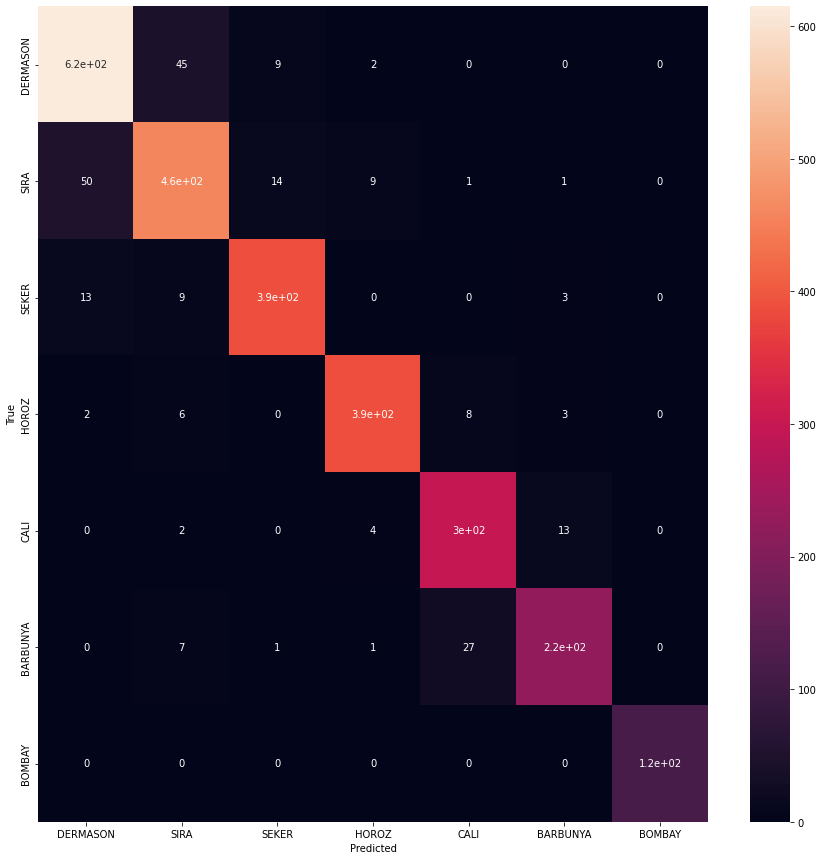

In [19]:
import matplotlib.ticker as ticker

labels = ['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']
plt.figure(figsize=(15,15))
# create the confusion matrix heatmap
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)

# Add x and y axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plot
plt.show()

In [21]:
import pickle
# Open a file and use dump() 
with open('randfor.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(model, file)